In [16]:
#Dependencies
import pandas as pd
import tweepy
from datetime import datetime as dt
from datetime import date
from datetime import timedelta
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from time import strftime
import math


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from apikeys import consumer_key, consumer_secret, access_token, access_token_secret




import requests
import json
from apikeys import av_key
import pandas as pd
import os
import csv
import sys

from functools import reduce
from scipy import stats
from textwrap import wrap

In [17]:
# Read Main_Data CSV file

merge_table1=pd.read_csv('Resource_CSVs/Main_data_positive.csv')

# Calculating Correlation - Method 1
# https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.corr.html
merge_table1.corr(method='pearson', min_periods=1)

,index,Likes,Retweets,Compound,Negative,Neutral,Positive,S&P500 Open,S&P500 Close,DJ Open,...,Insurance Same-Day Change,Insurance 1-Day Change,Oil Same-Day Change,Oil 1-Day Change,Semiconductor Same-Day Change,Semiconductor 1-Day Change,Telecom Same-Day Change,Telecom 1-Day Change,Utility Same-Day Change,Utility 1-Day Change
index,1.000000,0.095912,0.120349,-0.022875,0.095198,-0.094974,0.007934,0.891213,0.890491,0.859910,...,-0.068984,-0.113348,-0.062327,0.038311,-0.008570,-0.052288,-0.051559,0.016439,0.126894,0.072243
Likes,0.095912,1.000000,0.936314,-0.254536,0.166645,0.055573,-0.246214,0.096377,0.107983,0.102236,...,0.004781,-0.050612,0.026362,0.034154,0.045676,0.010926,0.061108,0.050967,0.021318,0.146255
Retweets,0.120349,0.936314,1.000000,-0.276449,0.158722,0.082885,-0.269660,0.096697,0.099457,0.102170,...,-0.037103,-0.051318,-0.026484,0.035368,0.033141,0.033657,0.029010,0.071955,-0.014143,0.135786
Compound,-0.022875,-0.254536,-0.276449,1.000000,-0.805310,0.155553,0.691334,-0.013590,-0.013028,-0.031932,...,0.072735,-0.037731,-0.106770,0.036173,-0.101989,-0.085761,-0.031253,-0.083777,0.083258,0.001081
Negative,0.095198,0.166645,0.158722,-0.805310,1.000000,-0.610489,-0.368736,0.062856,0.067075,0.083064,...,-0.012815,-0.072212,0.094534,-0.105157,0.136702,0.101798,0.075882,0.052984,-0.055866,0.006657
Neutral,-0.094974,0.055573,0.082885,0.155553,-0.610489,1.000000,-0.511100,-0.031969,-0.037169,-0.021993,...,-0.064556,0.124234,-0.062727,0.062437,-0.109700,-0.014362,-0.098682,-0.025105,0.000929,0.011581
Positive,0.007934,-0.246214,-0.269660,0.691334,-0.368736,-0.511100,1.000000,-0.030875,-0.029342,-0.064474,...,0.089887,-0.067081,-0.029115,0.041045,-0.019396,-0.093153,0.033593,-0.027753,0.059374,-0.020649
S&P500 Open,0.891213,0.096377,0.096697,-0.013590,0.062856,-0.031969,-0.030875,1.000000,0.988388,0.983643,...,-0.133849,-0.139148,-0.096522,-0.012108,-0.080609,-0.019717,-0.114722,-0.005228,0.048721,-0.089251
S&P500 Close,0.890491,0.107983,0.099457,-0.013028,0.067075,-0.037169,-0.029342,0.988388,1.000000,0.974418,...,-0.026184,-0.130927,-0.030594,0.002036,0.023359,-0.036111,0.012251,-0.007764,0.090689,-0.055899
DJ Open,0.859910,0.102236,0.102170,-0.031932,0.083064,-0.021993,-0.064474,0.983643,0.974418,1.000000,...,-0.115043,-0.143108,-0.089893,-0.001655,-0.050259,0.001622,-0.091530,0.009232,0.010069,-0.137113


In [18]:
# Calculating Correlation - Method 2
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

listn =[]
correlation =[]
pvalue =[]

a = "Likes"
b = "S&P500 Same-Day Change"
c = stats.pearsonr(merge_table1[a], merge_table1[b])

print (f"Correlation = {c[0]}")
print (f"P-value = {c[1]}")

Correlation = 0.06355209973210206
P-value = 0.48136548646774835


In [19]:
# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/named_column_selection_loc/
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.r_.html

stats_df = merge_table1.iloc[:, np.r_[1,7, 34:len(merge_table1.columns)]]
print (stats_df.head(2))


         Date  Positive  S&P500 Same-Day Change  S&P500 1-Day Change  \
0  2017-06-02     0.104                    0.32                -0.12   
1  2017-06-05     0.172                   -0.07                -0.28   

   S&P500 2-Day Change  DJ Same-Day Change  DJ 1-Day Change  DJ 2-Day Change  \
0                -0.40                0.30            -0.10            -0.33   
1                -0.12               -0.05            -0.23            -0.05   

   NAS Same-Day Change  NAS 1-Day Change          ...           \
0                 0.71             -0.16          ...            
1                -0.16             -0.33          ...            

   Insurance Same-Day Change  Insurance 1-Day Change  Oil Same-Day Change  \
0                       0.61                   -0.83                -0.43   
1                      -0.72                   -1.23                 1.11   

   Oil 1-Day Change  Semiconductor Same-Day Change  \
0              0.44                           0.30   
1  

In [20]:
stats_df.describe()

,Positive,S&P500 Same-Day Change,S&P500 1-Day Change,S&P500 2-Day Change,DJ Same-Day Change,DJ 1-Day Change,DJ 2-Day Change,NAS Same-Day Change,NAS 1-Day Change,NAS 2-Day Change,...,Insurance Same-Day Change,Insurance 1-Day Change,Oil Same-Day Change,Oil 1-Day Change,Semiconductor Same-Day Change,Semiconductor 1-Day Change,Telecom Same-Day Change,Telecom 1-Day Change,Utility Same-Day Change,Utility 1-Day Change
count,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,...,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.00000,125.000000,125.00000,125.000000
mean,0.187537,-0.058640,0.004000,0.06568,-0.019600,0.023520,0.111120,-0.09240,0.041680,0.129680,...,-0.051360,-0.074960,-0.053200,-0.17624,-0.209920,0.072080,-0.09168,0.075440,0.03640,-0.059920
std,0.075099,0.678283,0.868569,0.85295,0.750076,0.928587,0.947146,0.83717,1.045494,1.099666,...,0.747197,0.936246,1.434669,1.78375,1.373128,1.586657,0.86685,1.135615,0.77294,0.690128
min,0.100500,-3.360000,-4.100000,-2.43000,-3.920000,-4.600000,-3.150000,-3.40000,-3.900000,-3.760000,...,-2.900000,-3.570000,-3.440000,-4.28000,-4.810000,-4.720000,-3.95000,-4.500000,-2.02000,-1.650000
25%,0.128000,-0.210000,-0.230000,-0.32000,-0.220000,-0.240000,-0.330000,-0.42000,-0.330000,-0.450000,...,-0.510000,-0.640000,-0.800000,-1.34000,-0.940000,-0.900000,-0.51000,-0.420000,-0.45000,-0.490000
50%,0.168667,0.000000,0.070000,0.12000,0.060000,0.100000,0.180000,0.00000,0.020000,0.170000,...,-0.010000,-0.010000,-0.070000,-0.08000,-0.120000,0.230000,-0.10000,0.110000,0.04000,-0.030000
75%,0.228000,0.190000,0.330000,0.56000,0.300000,0.440000,0.710000,0.36000,0.570000,0.760000,...,0.450000,0.400000,0.930000,0.70000,0.700000,0.870000,0.42000,0.580000,0.56000,0.370000
max,0.410000,2.350000,2.720000,2.01000,2.580000,2.840000,2.250000,3.38000,3.260000,2.590000,...,1.650000,2.730000,4.030000,3.65000,4.180000,4.240000,2.24000,3.770000,2.55000,1.620000


In [21]:
a = stats_df.columns[2:5]
print(a) 
type(a)

Index(['S&P500 Same-Day Change', 'S&P500 1-Day Change', 'S&P500 2-Day Change'], dtype='object')


pandas.core.indexes.base.Index

In [22]:
a = stats_df["S&P500 Same-Day Change"].mean()

In [23]:
# Computing Correlation for the Stock Indices
list_index =[]
correlation_index =[]
pvalue_index =[]
average_change = []

list_selected = stats_df.columns[2:11]

for cols in list_selected:
    list_index.append(cols)
    cor = stats.pearsonr(stats_df["Positive"], stats_df[cols])
    correlation_index.append(cor[0])
    pvalue_index.append(cor[1])
    mean = stats_df[cols].mean()
    average_change.append(mean)
    
correlation_index_df = pd.DataFrame({
    'Indices': list_index,
    'Correlation_Positive Score': correlation_index,
    'Average Change': average_change
})

# correlation_index_df = correlation_index_df.sort_values('Correlation_Compound Score', ascending=True)
correlation_index_df

,Indices,Correlation_Positive Score,Average Change
0,S&P500 Same-Day Change,0.015231,-0.05864
1,S&P500 1-Day Change,-0.090328,0.00400
2,S&P500 2-Day Change,-0.156599,0.06568
3,DJ Same-Day Change,0.036331,-0.01960
4,DJ 1-Day Change,-0.138956,0.02352
5,DJ 2-Day Change,-0.184228,0.11112
6,NAS Same-Day Change,-0.013999,-0.09240
7,NAS 1-Day Change,-0.071961,0.04168
8,NAS 2-Day Change,-0.152332,0.12968


In [24]:
correlation_index_df["Correlation_Positive Score"][0]

0.015230639912487617

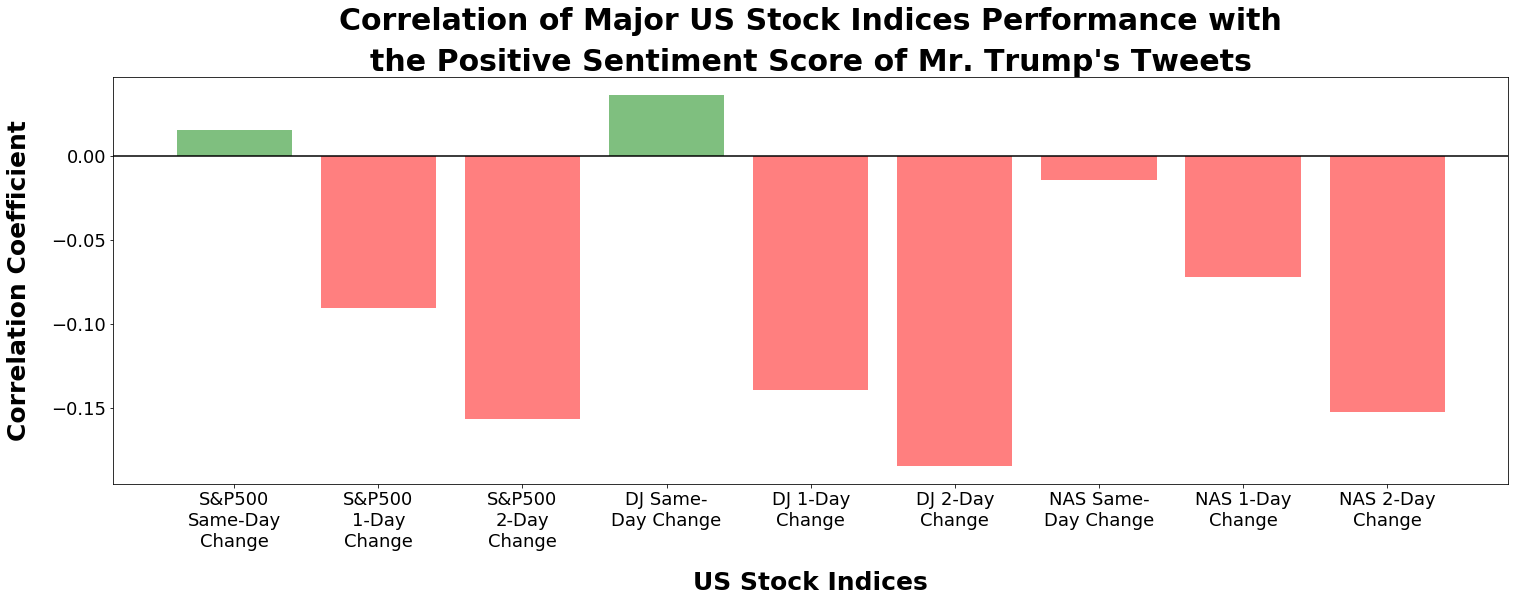

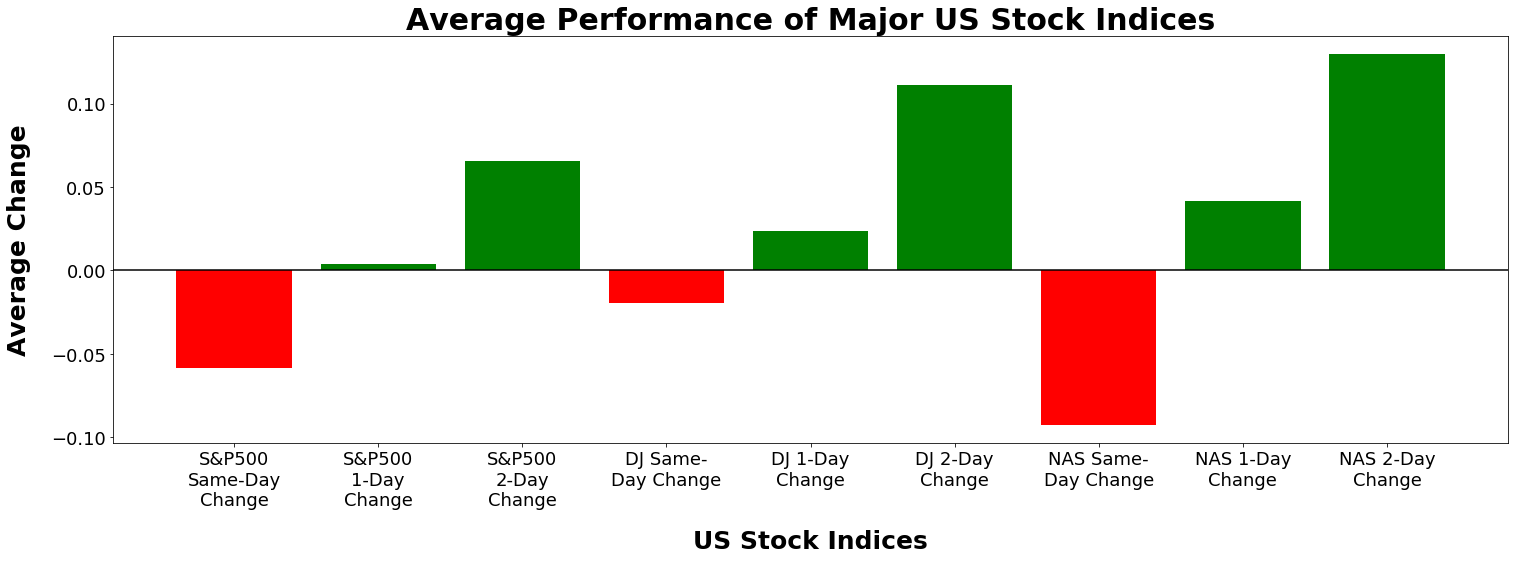

<Figure size 432x288 with 0 Axes>

In [25]:
#  Plotting the stock correlation bar chart
x = len (correlation_index_df)

x_axis = np.arange(len(correlation_index_df))
y_axis = correlation_index_df["Correlation_Positive Score"]
labels = correlation_index_df["Indices"]
# wrap axis lables
labels = [ '\n'.join(wrap(l, 10)) for l in labels ]


plt.figure(figsize = (25,7.5))
plt.tick_params(axis="both", labelsize =18)
plt.bar(x_axis, y_axis, alpha=0.5, tick_label=labels,
        color = ['red' if correlation_index_df["Correlation_Positive Score"][y] < 0 
                 else 'green' for y in range (0,x)])


title_text = (f"Correlation of Major US Stock Indices Performance with the Positive Sentiment Score of Mr. Trump's Tweets")
title_text = '\n'.join(wrap(title_text,55))

plt.title(title_text, fontdict = {'fontsize': 30, 'fontweight': 'bold'}, linespacing=1.5)
plt.ylabel('Correlation Coefficient', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.xlabel('US Stock Indices', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero


#  Plotting the Average Performance bar chart
x = len (correlation_index_df)

x_axis = np.arange(len(correlation_index_df))
y_axis = correlation_index_df["Average Change"]
labels = correlation_index_df["Indices"]
# wrap axis lables
labels = [ '\n'.join(wrap(l, 10)) for l in labels ]


plt.figure(figsize = (25,7.5))
plt.tick_params(axis="both", labelsize =18)
plt.bar(x_axis, y_axis, tick_label=labels,
        color = ['red' if correlation_index_df["Average Change"][y] < 0 
                 else 'green' for y in range (0,x)])


title_text = (f"Average Performance of Major US Stock Indices")
title_text = '\n'.join(wrap(title_text,55))

plt.title(title_text, fontdict = {'fontsize': 30, 'fontweight': 'bold'}, linespacing=1.5)
plt.ylabel('Average Change', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.xlabel('US Stock Indices', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero


plt.savefig("Images/Correlation_Positive_Sentiment_Index.png")
plt.show()
plt.tight_layout()


In [26]:
sector_list = stats_df.columns[12:len(stats_df)]
print (sector_list)

Index(['Banking 1-Day Change', 'Biotech Same-Day Change',
       'Biotech 1-Day Change', 'Healthcare Same-Day Change',
       'Healthcare 1-Day Change', 'Housing Same-Day Change',
       'Housing 1-Day Change', 'Industrial Same-Day Change',
       'Industrial 1-Day Change', 'Insurance Same-Day Change',
       'Insurance 1-Day Change', 'Oil Same-Day Change', 'Oil 1-Day Change',
       'Semiconductor Same-Day Change', 'Semiconductor 1-Day Change',
       'Telecom Same-Day Change', 'Telecom 1-Day Change',
       'Utility Same-Day Change', 'Utility 1-Day Change'],
      dtype='object')


In [27]:
# Computing Correlation for the Sector Indices - Same Day Performance
list_sectors1 =[]
correlation_sector1 =[]
pvalue_sector1 =[]
average_change = []

sector_list1 = stats_df.columns[[11,13,15,17,19,21,23,25,27,29]]


for cols in sector_list1:
    list_sectors1.append(cols)
    cor = stats.pearsonr(stats_df["Positive"], stats_df[cols])
    correlation_sector1.append(cor[0])
    pvalue_sector1.append(cor[1])
    mean = stats_df[cols].mean()
    average_change.append(mean)
    
correlation_sector_df1 = pd.DataFrame({
    'Sectors': list_sectors1,
    'Correlation_Positive Score': correlation_sector1,
    'Average Change' : average_change
})

correlation_sector_df1

,Sectors,Correlation_Positive Score,Average Change
0,Banking Same-Day Change,0.080086,-0.08568
1,Biotech Same-Day Change,0.098554,-0.12648
2,Healthcare Same-Day Change,0.087072,-0.08064
3,Housing Same-Day Change,-0.099744,-0.03136
4,Industrial Same-Day Change,-0.077255,-0.08848
5,Insurance Same-Day Change,0.089887,-0.05136
6,Oil Same-Day Change,-0.029115,-0.05320
7,Semiconductor Same-Day Change,-0.019396,-0.20992
8,Telecom Same-Day Change,0.033593,-0.09168
9,Utility Same-Day Change,0.059374,0.03640


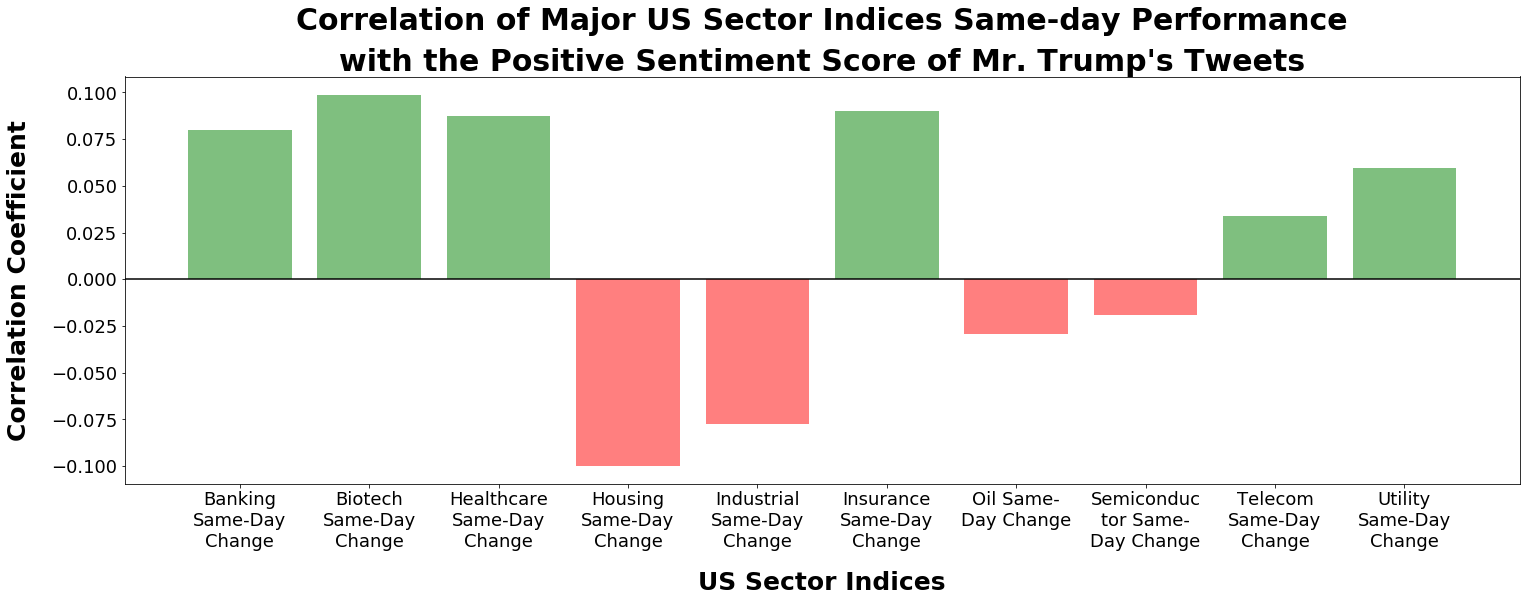

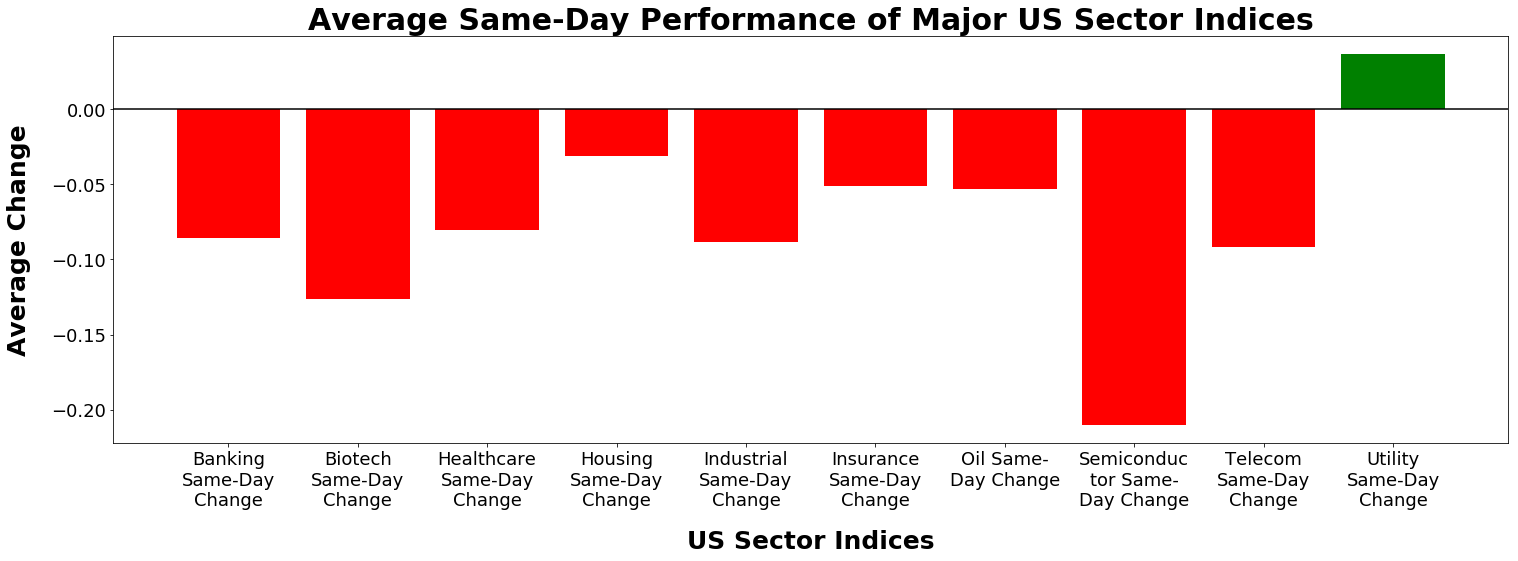

<Figure size 432x288 with 0 Axes>

In [28]:
#  Plotting the sector correlation bar chart
x = len (correlation_sector_df1)

x_axis = np.arange(len(correlation_sector_df1))
y_axis = correlation_sector_df1["Correlation_Positive Score"]
labels = correlation_sector_df1["Sectors"]
# wrap axis lables
labels = [ '\n'.join(wrap(l, 10)) for l in labels ]


plt.figure(figsize = (25,7.5))
plt.tick_params(axis="both", labelsize =18)
plt.bar(x_axis, y_axis, alpha=0.5, tick_label=labels,
        color = ['red' if correlation_sector_df1["Correlation_Positive Score"][y] < 0 
                 else 'green' for y in range (0,x)])


title_text = (f"Correlation of Major US Sector Indices Same-day Performance with the Positive Sentiment Score of Mr. Trump's Tweets")
title_text = '\n'.join(wrap(title_text,60))

plt.title(title_text, fontdict = {'fontsize': 30, 'fontweight': 'bold'}, linespacing=1.5)
plt.ylabel('Correlation Coefficient', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.xlabel('US Sector Indices', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero



#  Plotting the Average Performance bar chart
x = len (correlation_sector_df1)

x_axis = np.arange(len(correlation_sector_df1))
y_axis = correlation_sector_df1["Average Change"]
labels = correlation_sector_df1["Sectors"]
# wrap axis lables
labels = [ '\n'.join(wrap(l, 10)) for l in labels ]


plt.figure(figsize = (25,7.5))
plt.tick_params(axis="both", labelsize =18)
plt.bar(x_axis, y_axis, tick_label=labels,
        color = ['red' if correlation_sector_df1["Average Change"][y] < 0 
                 else 'green' for y in range (0,x)])


title_text = (f"Average Same-Day Performance of Major US Sector Indices")
title_text = '\n'.join(wrap(title_text,60))

plt.title(title_text, fontdict = {'fontsize': 30, 'fontweight': 'bold'}, linespacing=1.5)
plt.ylabel('Average Change', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.xlabel('US Sector Indices', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero



plt.savefig("Images/Correlation_Positive_Sentiment_Sector1.png")
plt.show()
plt.tight_layout()

In [29]:
# Computing Correlation for the Sector Indices - Next Days Performance
list_sectors1 =[]
correlation_sector1 =[]
pvalue_sector1 =[]
average_change = []

sector_list1 = stats_df.columns[[12,14,16,18,20,22,24,26,28,30]]


for cols in sector_list1:
    list_sectors1.append(cols)
    cor = stats.pearsonr(stats_df["Positive"], stats_df[cols])
    correlation_sector1.append(cor[0])
    pvalue_sector1.append(cor[1])
    mean = stats_df[cols].mean()
    average_change.append(mean)
    
correlation_sector_df1 = pd.DataFrame({
    'Sectors': list_sectors1,
    'Correlation_Positive Score': correlation_sector1,
    'Average Change' : average_change
})

correlation_sector_df1

,Sectors,Correlation_Positive Score,Average Change
0,Banking 1-Day Change,-0.041871,-0.04256
1,Biotech 1-Day Change,-0.113626,-0.02488
2,Healthcare 1-Day Change,-0.101741,-0.00440
3,Housing 1-Day Change,-0.149235,0.01688
4,Industrial 1-Day Change,-0.055670,0.02096
5,Insurance 1-Day Change,-0.067081,-0.07496
6,Oil 1-Day Change,0.041045,-0.17624
7,Semiconductor 1-Day Change,-0.093153,0.07208
8,Telecom 1-Day Change,-0.027753,0.07544
9,Utility 1-Day Change,-0.020649,-0.05992


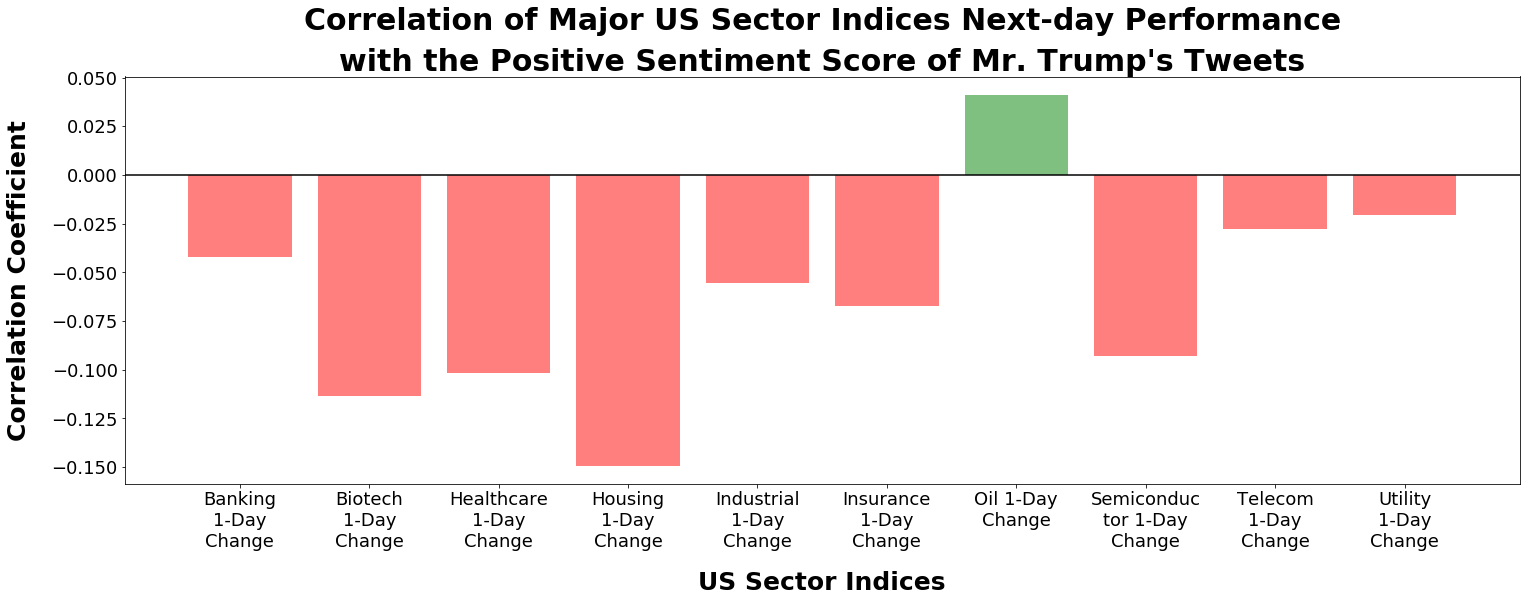

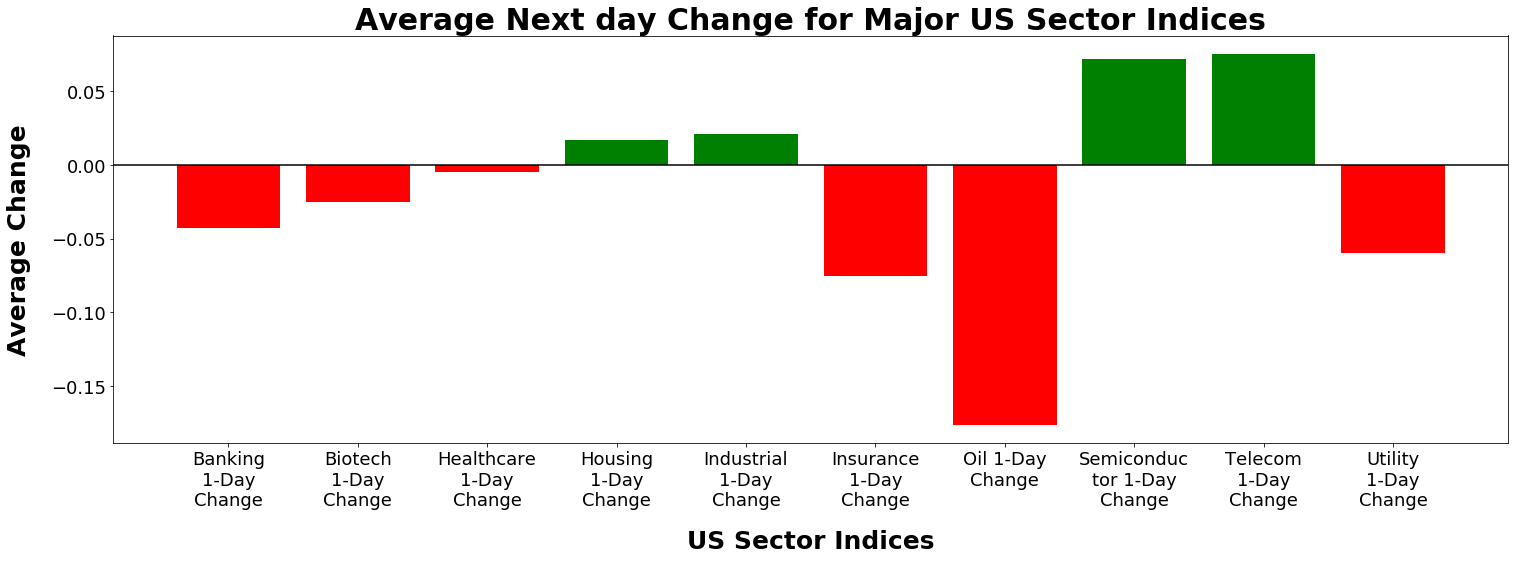

<Figure size 432x288 with 0 Axes>

In [30]:
#  Plotting the sector correlation bar chart -2 - Next day's Performance
x = len (correlation_sector_df1)

x_axis = np.arange(len(correlation_sector_df1))
y_axis = correlation_sector_df1["Correlation_Positive Score"]
labels = correlation_sector_df1["Sectors"]
# wrap axis lables
labels = [ '\n'.join(wrap(l, 10)) for l in labels ]


plt.figure(figsize = (25,7.5))
plt.tick_params(axis="both", labelsize =18)
plt.bar(x_axis, y_axis, alpha=0.5, tick_label=labels,
        color = ['red' if correlation_sector_df1["Correlation_Positive Score"][y] < 0 
                 else 'green' for y in range (0,x)])


title_text = (f"Correlation of Major US Sector Indices Next-day Performance with the Positive Sentiment Score of Mr. Trump's Tweets")
title_text = '\n'.join(wrap(title_text,60))

plt.title(title_text, fontdict = {'fontsize': 30, 'fontweight': 'bold'}, linespacing=1.5)
plt.ylabel('Correlation Coefficient', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.xlabel('US Sector Indices', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero


#  Plotting the Average Performance bar chart
x = len (correlation_sector_df1)

x_axis = np.arange(len(correlation_sector_df1))
y_axis = correlation_sector_df1["Average Change"]
labels = correlation_sector_df1["Sectors"]
# wrap axis lables
labels = [ '\n'.join(wrap(l, 10)) for l in labels ]


plt.figure(figsize = (25,7.5))
plt.tick_params(axis="both", labelsize =18)
plt.bar(x_axis, y_axis, tick_label=labels,
        color = ['red' if correlation_sector_df1["Average Change"][y] < 0 
                 else 'green' for y in range (0,x)])


title_text = (f"Average Next day Change for Major US Sector Indices")
title_text = '\n'.join(wrap(title_text,60))

plt.title(title_text, fontdict = {'fontsize': 30, 'fontweight': 'bold'}, linespacing=1.5)
plt.ylabel('Average Change', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.xlabel('US Sector Indices', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero

plt.savefig("Images/Correlation_Positive_Sentiment_Sector2.png")
plt.show()
plt.tight_layout()